**Importing neccessary libraries**

In [226]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

loading data into df

In [227]:
df = pd.read_csv('Ecom_CRM_analysis.csv', encoding='latin-1')

In [228]:
df.shape

(541909, 8)

observing the top rows of data

In [229]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


getting to know the datatypes of data

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


changing the datatypes to relevant types for analysis

In [231]:
#convert stockcode to category type
df['StockCode'] = df['StockCode'].astype('category')
#convert customerid to int and then to category type
df['CustomerID'] = df['CustomerID'].astype('category')
#convert invoicedate to datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
#convert country to category type
df['Country'] = df['Country'].astype('category')

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  category      
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  category      
 7   Country      541909 non-null  category      
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 23.6+ MB


In [233]:
df['InvoiceNo'].nunique() / len(df)  # If this ratio is low, consider converting


0.047794002314041656

In [234]:
df['Description'].nunique() / len(df)  # If this ratio is low, consider converting


0.007792821303945865

lets convert invoiceno and description to category datatype to save memory

In [235]:
#convert invoiceno and description to category
df['InvoiceNo'] = df['InvoiceNo'].astype('category')
df['Description'] = df['Description'].astype('category')

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  category      
 1   StockCode    541909 non-null  category      
 2   Description  540455 non-null  category      
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  category      
 7   Country      541909 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(1), int64(1)
memory usage: 18.7 MB


In [237]:
#splitting the invoicedate into two, by storing the date part in invoicedate and storing the time in new column 'Transaction_Time'
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date
df['Transaction_Time'] = pd.to_datetime(df['InvoiceDate']).dt.time


In [238]:
df.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Time
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,00:00:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,00:00:00
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09,4.95,12680.0,France,00:00:00


In [239]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
Transaction_Time,0


In [240]:
#rows where description is null
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Time
622,536414,22139,NaN,56,2010-12-01,0.0,NaN,United Kingdom,00:00:00
1970,536545,21134,NaN,1,2010-12-01,0.0,NaN,United Kingdom,00:00:00
1971,536546,22145,NaN,1,2010-12-01,0.0,NaN,United Kingdom,00:00:00
1972,536547,37509,NaN,1,2010-12-01,0.0,NaN,United Kingdom,00:00:00
1987,536549,85226A,NaN,1,2010-12-01,0.0,NaN,United Kingdom,00:00:00
...,...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07,0.0,NaN,United Kingdom,00:00:00
535326,581203,23406,NaN,15,2011-12-07,0.0,NaN,United Kingdom,00:00:00
535332,581209,21620,NaN,6,2011-12-07,0.0,NaN,United Kingdom,00:00:00
536981,581234,72817,NaN,27,2011-12-08,0.0,NaN,United Kingdom,00:00:00


In [241]:
#convert description to object and fill null values with 'Unknown'
df['Description'] = df['Description'].astype('object')
df['Description'] = df['Description'].fillna('Unknown')



In [242]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
Transaction_Time,0


In [243]:
#convert description to category
df['Description'] = df['Description'].astype('category')

In [244]:
#convert customerid to object and filling null values with 'Unknown'
df['CustomerID'] = df['CustomerID'].astype('object')
df['CustomerID'] = df['CustomerID'].fillna('Unknown')



In [245]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Transaction_Time,0


In [246]:
#convert customerid to category
df['CustomerID'] = df['CustomerID'].astype('category')

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   InvoiceNo         541909 non-null  category
 1   StockCode         541909 non-null  category
 2   Description       541909 non-null  category
 3   Quantity          541909 non-null  int64   
 4   InvoiceDate       541909 non-null  object  
 5   UnitPrice         541909 non-null  float64 
 6   CustomerID        541909 non-null  category
 7   Country           541909 non-null  category
 8   Transaction_Time  541909 non-null  object  
dtypes: category(5), float64(1), int64(1), object(2)
memory usage: 22.9+ MB


<Axes: ylabel='UnitPrice'>

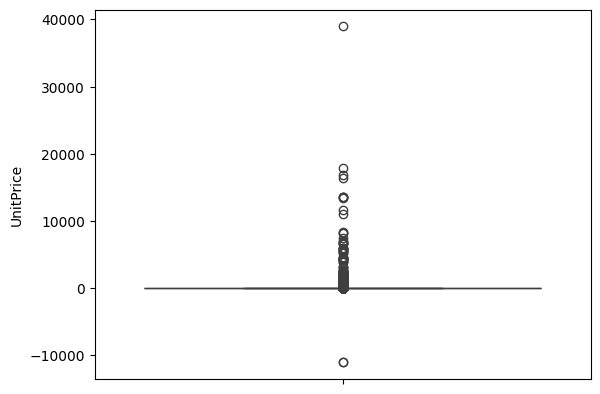

In [248]:
#Identifying the outliers for all values in UnitPrice Column in the data using seaborn library
sns.boxplot(df['UnitPrice'])

In [249]:
df[(df['UnitPrice'] > 20000) ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Time
222681,C556445,M,Manual,-1,2011-06-10,38970.0,15098.0,United Kingdom,00:00:00


In [250]:
df[(df['UnitPrice'] < 0) ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Time
299983,A563186,B,Adjust bad debt,1,2011-08-12,-11062.06,Unknown,United Kingdom,00:00:00
299984,A563187,B,Adjust bad debt,1,2011-08-12,-11062.06,Unknown,United Kingdom,00:00:00


In [251]:
df2 = df.copy()

In [252]:
#removing outliers in unitprice column of df from df2
df2 = df2[df2['UnitPrice'] < 20000.0]

In [253]:
df2.shape

(541908, 9)

In [254]:
#rows in df where unitprice is 0
df[df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Time
622,536414,22139,Unknown,56,2010-12-01,0.0,Unknown,United Kingdom,00:00:00
1970,536545,21134,Unknown,1,2010-12-01,0.0,Unknown,United Kingdom,00:00:00
1971,536546,22145,Unknown,1,2010-12-01,0.0,Unknown,United Kingdom,00:00:00
1972,536547,37509,Unknown,1,2010-12-01,0.0,Unknown,United Kingdom,00:00:00
1987,536549,85226A,Unknown,1,2010-12-01,0.0,Unknown,United Kingdom,00:00:00
...,...,...,...,...,...,...,...,...,...
536981,581234,72817,Unknown,27,2011-12-08,0.0,Unknown,United Kingdom,00:00:00
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08,0.0,Unknown,United Kingdom,00:00:00
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08,0.0,Unknown,United Kingdom,00:00:00
538554,581408,85175,Unknown,20,2011-12-08,0.0,Unknown,United Kingdom,00:00:00




---
so there are 2515 transactions with unitprice 0 which means they are related to free products





---



<Axes: ylabel='Quantity'>

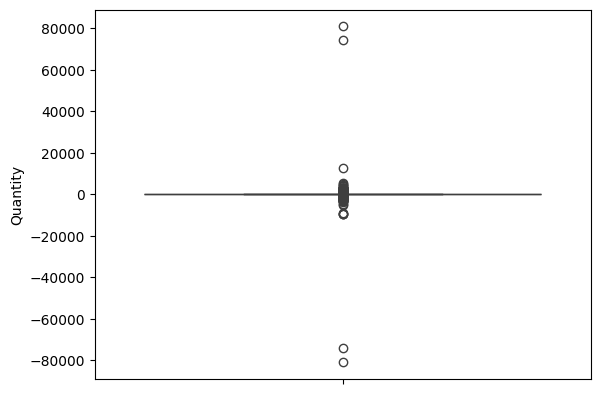

In [255]:
#outliers in quantity column of df
sns.boxplot(df['Quantity'])

In [256]:
df2['Quantity'] = df['Quantity']<20000

In [257]:
df2.shape

(541908, 9)

In [258]:
#rows where quantity is less than 0 in df
df[df['Quantity'] < 0]




,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Time
141,C536379,D,Discount,-1,2010-12-01,27.50,14527.0,United Kingdom,00:00:00
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01,4.65,15311.0,United Kingdom,00:00:00
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01,1.65,17548.0,United Kingdom,00:00:00
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom,00:00:00
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom,00:00:00
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09,0.83,14397.0,United Kingdom,00:00:00
541541,C581499,M,Manual,-1,2011-12-09,224.69,15498.0,United Kingdom,00:00:00
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09,10.95,15311.0,United Kingdom,00:00:00
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09,1.25,17315.0,United Kingdom,00:00:00




---
so there are 10624 transactions where quantity is negative which indicates return transactions & not purchase


---




In [259]:
# rows in df where invoiceno starts with c
df[df['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Time
141,C536379,D,Discount,-1,2010-12-01,27.50,14527.0,United Kingdom,00:00:00
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01,4.65,15311.0,United Kingdom,00:00:00
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01,1.65,17548.0,United Kingdom,00:00:00
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom,00:00:00
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom,00:00:00
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09,0.83,14397.0,United Kingdom,00:00:00
541541,C581499,M,Manual,-1,2011-12-09,224.69,15498.0,United Kingdom,00:00:00
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09,10.95,15311.0,United Kingdom,00:00:00
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09,1.25,17315.0,United Kingdom,00:00:00




---
so only 9288 transactions are actually cancelled in 10624 transactions where quantity is negative

---




In [260]:
# rows where quantity is less than 0 and invoiceno doesnt starts with c in df

df[(df['Quantity'] < 0) & (~df['InvoiceNo'].str.startswith('C'))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Time
2406,536589,21777,Unknown,-10,2010-12-01,0.0,Unknown,United Kingdom,00:00:00
4347,536764,84952C,Unknown,-38,2010-12-02,0.0,Unknown,United Kingdom,00:00:00
7188,536996,22712,Unknown,-20,2010-12-03,0.0,Unknown,United Kingdom,00:00:00
7189,536997,22028,Unknown,-20,2010-12-03,0.0,Unknown,United Kingdom,00:00:00
7190,536998,85067,Unknown,-6,2010-12-03,0.0,Unknown,United Kingdom,00:00:00
...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07,0.0,Unknown,United Kingdom,00:00:00
535335,581212,22578,lost,-1050,2011-12-07,0.0,Unknown,United Kingdom,00:00:00
535336,581213,22576,check,-30,2011-12-07,0.0,Unknown,United Kingdom,00:00:00
536908,581226,23090,missing,-338,2011-12-08,0.0,Unknown,United Kingdom,00:00:00




---
the rest of 1336 transactions are where the description is check, lost, missing, smashed,unknown etc


---




In [261]:
#check for duplicates in df
df.duplicated().sum()

5269

In [262]:
#remove the duplicates in df from df2
df2 = df.drop_duplicates()

In [263]:
df2.shape

(536640, 9)

In [264]:
df2.duplicated().sum()

0

In [265]:
df2.describe()

,Quantity,UnitPrice
count,536640.000000,536640.000000
mean,9.620043,4.632661
std,219.130360,97.233208
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [266]:
#rows where unitprice is greater than 20000 in df2
df2[df2['UnitPrice'] > 20000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Time
222681,C556445,M,Manual,-1,2011-06-10,38970.0,15098.0,United Kingdom,00:00:00


In [267]:
df2[df2['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Time
299983,A563186,B,Adjust bad debt,1,2011-08-12,-11062.06,Unknown,United Kingdom,00:00:00
299984,A563187,B,Adjust bad debt,1,2011-08-12,-11062.06,Unknown,United Kingdom,00:00:00


In [268]:
#remove the rows where unitprice is greater than 20000  and less than 0 in df2
df2 = df2[df2['UnitPrice'] > 0]
df2 = df2[df2['UnitPrice'] < 20000]

In [269]:
df2.describe()

,Quantity,UnitPrice
count,534127.000000,534127.000000
mean,9.916853,4.622918
std,216.452518,78.724218
min,-80995.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.130000
max,80995.000000,17836.460000


In [270]:
#remove the rows where quantity is greater than 40000  and less than -20000 in df2
df2 = df2[df2['Quantity'] > -20000]
df2 = df2[df2['Quantity'] < 40000]

In [271]:
df2.describe()

,Quantity,UnitPrice
count,534123.000000,534123.000000
mean,9.916927,4.622941
std,40.787914,78.724512
min,-9360.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.100000
75%,10.000000,4.130000
max,4800.000000,17836.460000


In [272]:
#Count of Unique InvoiceNo
df2['InvoiceNo'].nunique()

23791

In [273]:
df2['StockCode'].nunique()

3937

In [274]:
df['Country'].nunique()

38

In [275]:
df['CustomerID'].nunique()

4373

<Axes: >

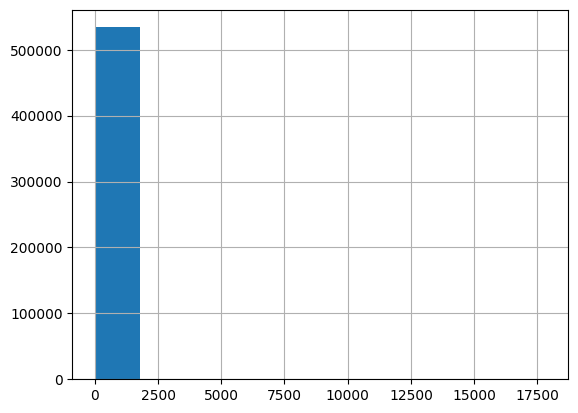

In [276]:
#plot a histogram for unitprice column
df2['UnitPrice'].hist()

In [277]:
#count of rows where unitprice<10
df2[df2['UnitPrice'] < 10].shape


(509151, 9)



---
most of the data lies where unitprice is less than 10


---




<Axes: >

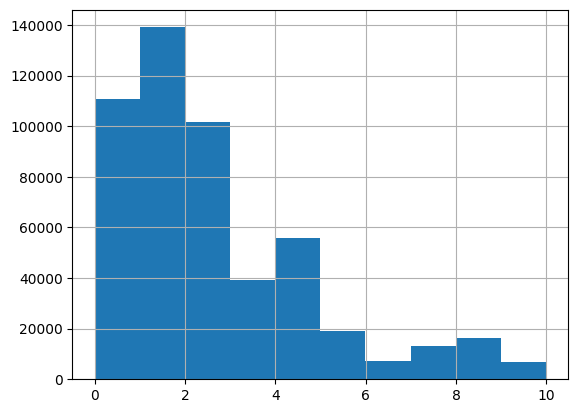

In [278]:
#plot histogram on unitprice of df2 where unitprice<5
df2[df2['UnitPrice'] < 10]['UnitPrice'].hist()

<Axes: >

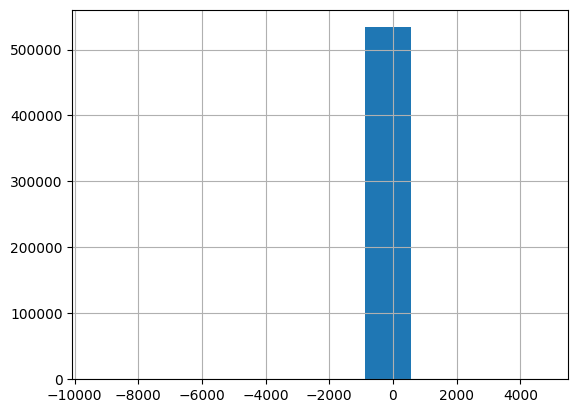

In [279]:
#plot a histogram for column quantity
df2['Quantity'].hist()

In [280]:
#display no.of rows where quantity is between -1500 and 30
df2[(df2['Quantity'] > -1500) & (df2['Quantity'] < 30)].shape

(507344, 9)



---
most of the data lies between -2000 and 30 in quantity column of df2


---




<Axes: >

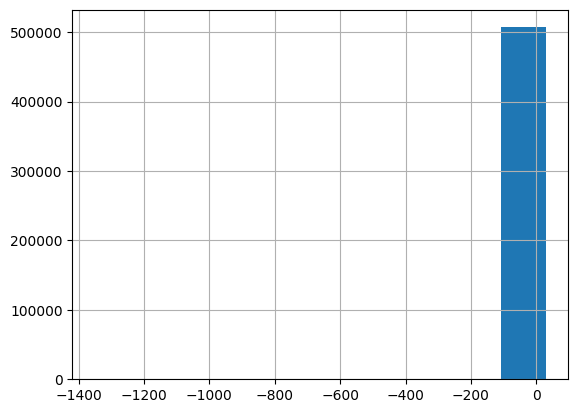

In [281]:
#plot histogram of quantity where quantity is between -2000 and 30
df2[(df2['Quantity'] > -1500) & (df2['Quantity'] < 30)]['Quantity'].hist()

<Axes: >

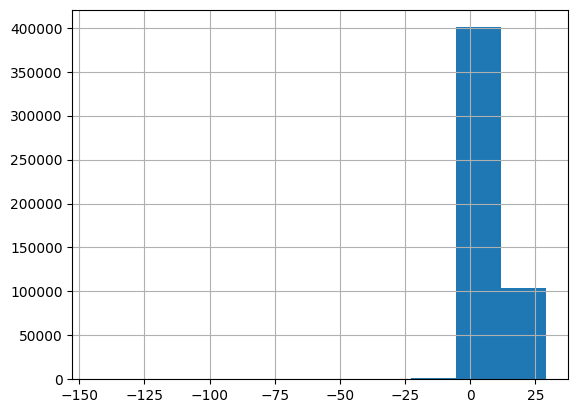

In [282]:
#plot a histogram of quantity where is between -150 and 30
df2[(df2['Quantity'] > -150) & (df2['Quantity'] < 30)]['Quantity'].hist()

<Axes: >

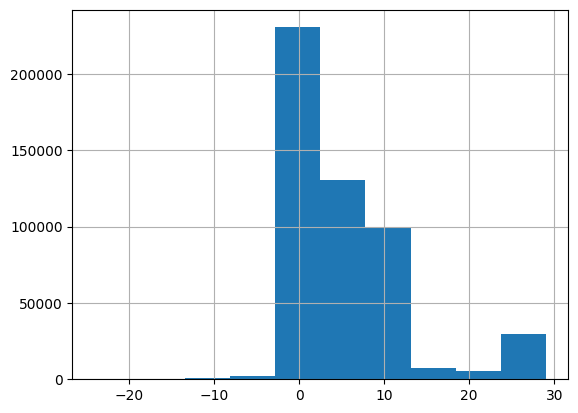

In [283]:
#plot a histogram of quantity where is between -25 and 30
df2[(df2['Quantity'] > -25) & (df2['Quantity'] < 30)]['Quantity'].hist()

In [284]:
#rows in df2 where quantity is less than 0 and invoiceno doesnt have c
df2[(df2['Quantity'] < 0) & (~df2['InvoiceNo'].str.startswith('C'))]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Time


<Axes: >

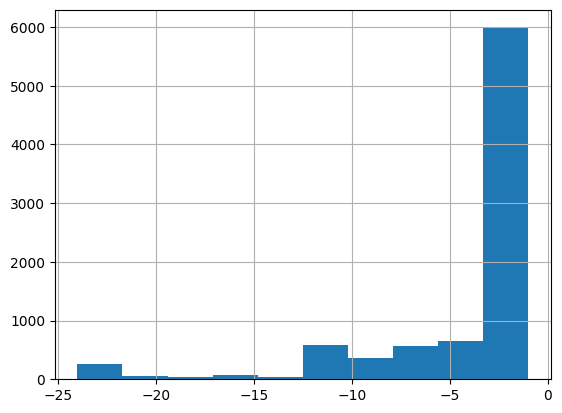

In [285]:
#plot histogram for quantity where quantity between -25 and 0
df2[(df2['Quantity'] > -25) & (df2['Quantity'] < 0)]['Quantity'].hist()



---
above is the histogram of quantity for cancelled transactions


---




In [286]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534123 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   InvoiceNo         534123 non-null  category
 1   StockCode         534123 non-null  category
 2   Description       534123 non-null  category
 3   Quantity          534123 non-null  int64   
 4   InvoiceDate       534123 non-null  object  
 5   UnitPrice         534123 non-null  float64 
 6   CustomerID        534123 non-null  category
 7   Country           534123 non-null  category
 8   Transaction_Time  534123 non-null  object  
dtypes: category(5), float64(1), int64(1), object(2)
memory usage: 26.6+ MB


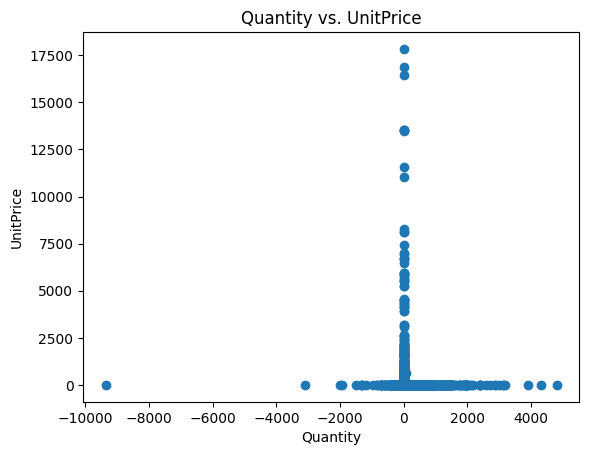

In [287]:

import matplotlib.pyplot as plt

# Scatter plot between Quantity and UnitPrice
plt.scatter(df2['Quantity'], df2['UnitPrice'])
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Quantity vs. UnitPrice')
plt.show()




In [288]:
# Correlation matrix for numerical variables
df2[['Quantity', 'UnitPrice']].corr()


,Quantity,UnitPrice
Quantity,1.000000,-0.008571
UnitPrice,-0.008571,1.000000




---
Since the correlation between Quantity and UnitPrice is close to 0, it suggests that changes in the quantity of items sold are not strongly influenced by the price of the items.

---




<ipython-input-289-038ba8eb0bf2>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2['Quantity'].resample('M').sum().plot(figsize=(12, 6))


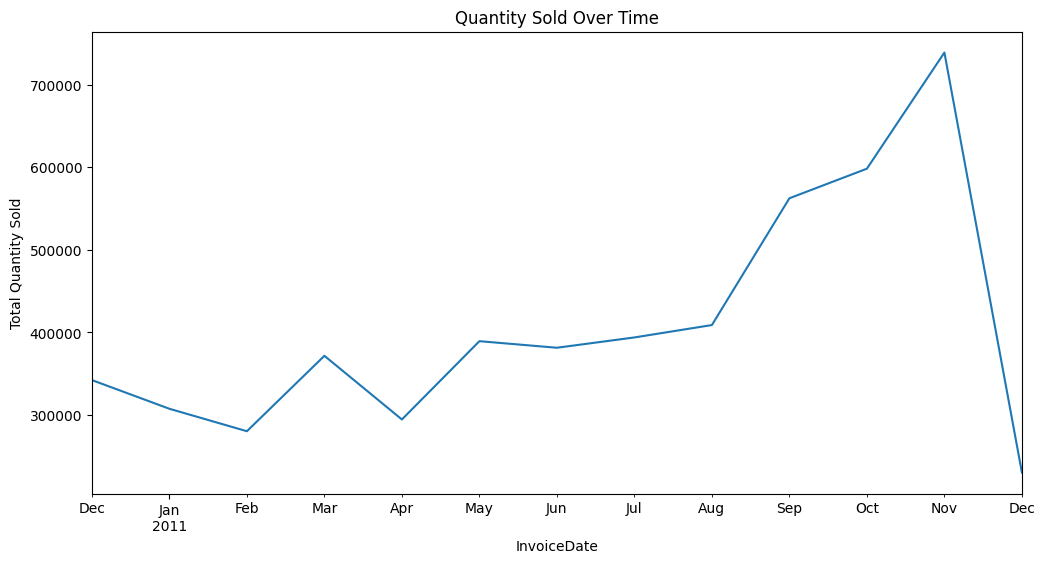

In [289]:


# Check if 'InvoiceDate' is in the columns
if 'InvoiceDate' in df2.columns:
    # Convert 'InvoiceDate' to datetime if it exists
    df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])
    df2.set_index('InvoiceDate', inplace=True)

    # Plotting Quantity sold over time
    df2['Quantity'].resample('M').sum().plot(figsize=(12, 6))
    plt.title('Quantity Sold Over Time')
    plt.ylabel('Total Quantity Sold')
    plt.xlabel('InvoiceDate')
    plt.show()
else:
    print("Column 'InvoiceDate' not found in the DataFrame.")
    # Further investigate your DataFrame or data loading process to find the correct column name
    print(df2.columns) # Print the available columns to help identify the issue

<ipython-input-290-51befdb5611c>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2['UnitPrice'].resample('M').mean().plot(figsize=(12,6))


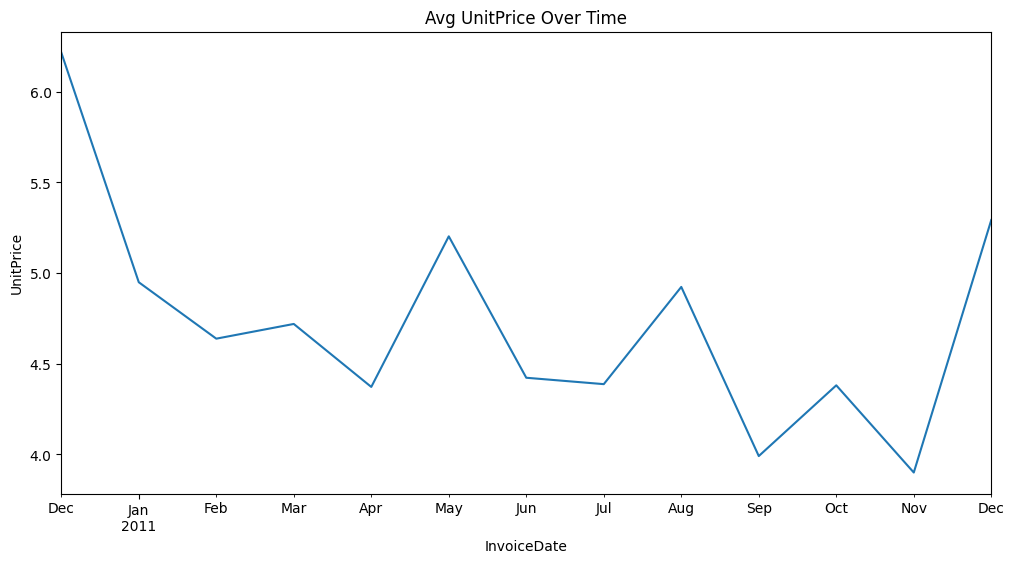

In [290]:


# Plotting Quantity sold over time
df2['UnitPrice'].resample('M').mean().plot(figsize=(12,6))
plt.title('Avg UnitPrice Over Time')
plt.ylabel('UnitPrice')
plt.xlabel('InvoiceDate')
plt.show()



---
**Feature Engineering**


---




In [291]:
df2.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'Transaction_Time'],
      dtype='object')

In [304]:
df2.index = pd.to_datetime(df2.index)
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])
df2['InvoiceDayOfWeek'] = df2.index.dayofweek  # Monday=0, Sunday=6
df2['InvoiceMonth'] = df2.index.month




In [305]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 534123 entries, 2010-12-01 to 2011-12-09
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   InvoiceNo                534123 non-null  category      
 1   StockCode                534123 non-null  category      
 2   Description              534123 non-null  category      
 3   Quantity                 534123 non-null  int64         
 4   UnitPrice                534123 non-null  float64       
 5   CustomerID               534123 non-null  category      
 6   Country                  534123 non-null  category      
 7   Transaction_Time         534123 non-null  object        
 8   InvoiceDayOfWeek         534123 non-null  int32         
 9   InvoiceMonth             534123 non-null  int32         
 10  Revenue                  534123 non-null  float64       
 11  PricePerItem             534123 non-null  float64       
 12  

In [294]:
df2['Revenue'] = df2['Quantity'] * df2['UnitPrice']


In [295]:
df2['PricePerItem'] = df2.groupby('StockCode')['UnitPrice'].transform('mean')


<ipython-input-295-4c6d344ef59e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2['PricePerItem'] = df2.groupby('StockCode')['UnitPrice'].transform('mean')


In [296]:
df2['TotalQuantityPerInvoice'] = df2.groupby('InvoiceNo')['Quantity'].transform('sum')


<ipython-input-296-7f84229a409b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2['TotalQuantityPerInvoice'] = df2.groupby('InvoiceNo')['Quantity'].transform('sum')


In [297]:
df2['CLV'] = df2.groupby('CustomerID')['Revenue'].transform('sum')


<ipython-input-297-a5753731c247>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2['CLV'] = df2.groupby('CustomerID')['Revenue'].transform('sum')


In [298]:
df2['AverageOrderValue'] = df2.groupby('CustomerID')['Revenue'].transform('mean')


<ipython-input-298-1ef8f693cbb2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2['AverageOrderValue'] = df2.groupby('CustomerID')['Revenue'].transform('mean')


In [299]:
# Check if 'InvoiceDate' column exists, and if not, print the available columns
if 'InvoiceDate' not in df2.columns:
    print(f"'InvoiceDate' column not found. Available columns: {df2.columns.tolist()}")
    # If you find a similar column with different casing, rename it:
    # For example, if the column is named 'invoicedate':
    # df2 = df2.rename(columns={'invoicedate': 'InvoiceDate'})
else:
    # If the column exists, check its data type
    print(f"Data type of 'InvoiceDate' column: {df2['InvoiceDate'].dtype}")
    # If the data type is not datetime, convert it:
    # df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])

    # Recency calculation
    df2['Recency'] = (df2['InvoiceDate'].max() - df2.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days

'InvoiceDate' column not found. Available columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice', 'CustomerID', 'Country', 'Transaction_Time', 'InvoiceDayOfWeek', 'InvoiceMonth', 'Revenue', 'PricePerItem', 'TotalQuantityPerInvoice', 'CLV', 'AverageOrderValue']


In [306]:
# Recency
df2['Recency'] = (df2['InvoiceDate'].max() - df2.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days

# Frequency
df2['Frequency'] = df2.groupby('CustomerID')['InvoiceNo'].transform('nunique')

# Monetary Value (Revenue)
df2['Monetary'] = df2.groupby('CustomerID')['Revenue'].transform('sum')


<ipython-input-306-404ab9b51317>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2['Recency'] = (df2['InvoiceDate'].max() - df2.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days
<ipython-input-306-404ab9b51317>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2['Frequency'] = df2.groupby('CustomerID')['InvoiceNo'].transform('nunique')
<ipython-input-306-404ab9b51317>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence thi

In [307]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 534123 entries, 2010-12-01 to 2011-12-09
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   InvoiceNo                534123 non-null  category      
 1   StockCode                534123 non-null  category      
 2   Description              534123 non-null  category      
 3   Quantity                 534123 non-null  int64         
 4   UnitPrice                534123 non-null  float64       
 5   CustomerID               534123 non-null  category      
 6   Country                  534123 non-null  category      
 7   Transaction_Time         534123 non-null  object        
 8   InvoiceDayOfWeek         534123 non-null  int32         
 9   InvoiceMonth             534123 non-null  int32         
 10  Revenue                  534123 non-null  float64       
 11  PricePerItem             534123 non-null  float64       
 12  

**Hypothesis Testing**

Null Hypothesis (H₀): There is no significant difference in the mean UnitPrice between two countries.

Alternative Hypothesis (H₁): There is a significant difference in the mean UnitPrice between two countries.

In [308]:
import pandas as pd
import scipy.stats as stats


In [309]:
# Filter for two countries
uk_data = df[df['Country'] == 'United Kingdom']['UnitPrice']
germany_data = df[df['Country'] == 'Germany']['UnitPrice']


In [310]:
print("UK Data: Mean =", uk_data.mean(), "Std =", uk_data.std())
print("Germany Data: Mean =", germany_data.mean(), "Std =", germany_data.std())


UK Data: Mean = 4.532422174142948 Std = 99.3154383319437
Germany Data: Mean = 3.9669299631384938 Std = 16.549025589684355


In [311]:
# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(uk_data, germany_data, equal_var=False)

# Print results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis - Significant difference exists between the two countries.")
else:
    print("Fail to reject the null hypothesis - No significant difference between the two countries.")


T-Statistic: 2.561154861650801
P-Value: 0.010437893045162114
Reject the null hypothesis - Significant difference exists between the two countries.
